# **DocParser: End-to-end OCR-free Information Extraction from Visually Rich Documents**

## **Abstract**
#### **Background**
- **시각적으로 풍부한 문서(visually rich document, VRD)에서의 정보 추출(Information Extraction, IE)** 은 중요한 연구 주제임  
  -> why? 실제 (문서 제어 기반) 애플리케이션에서 중요한 역할을 하기 때문
- **기존 방법**: 외부 딥러닝 기반 OCR 엔진에 의존함
    - 대부분의 기존 연구는 두 단계의 파이프라인을 따름
      1. OCR 엔진을 사용해 텍스트를 읽음
      2. OCR된 텍스트에서 관심있는 필드(필요한 정보)를 추출함
    - **한계**: 외부 OCR 시스템에 대한 의존성 -> 성능과 계산 속도에 부정적인 영향을 미침
- **Solution: OCR-free 방법론**
    - 최근 OCR-free 방법들이 제안되었으며, 이러한 방법들이 좋은 결과를 보여줌
    - 기존 방법의 한계를 해결하기 위해 고안됨
#### **New Method: <span style="background-color:#fff5b1">DocParser</span>**
본 논문에서는 <span style="background-color:#fff5b1">**OCR-free end-to-end information extraction model</span>인 DocParser**을 제안함
- **DocParser의 특징**
    - 차별적인 문자 특징을 효과적으로 추출함 (기존의 end-to-end 접근 방식과의 차이점)
    - 다양한 데이터셋에서 SOTA 달성 및 이전 방법들보다 더 빠르게 동작함

## **Keywords**
- Information Extraction
- Visually Rich Documents
- OCR-free
- End-to-end
- DocParser

## **1. Introduction**
#### **1.1 기존 방법(OCR-dependant approach)의 한계점**
기존의 대부분의 접근 방식은 **외부 딥러닝 기반 OCR 엔진**에 의존함
##### **training an OCR model**
- 학습을 위해 위치 주석과 텍스트 주석이 필요함
- 대규모 데이터셋과 막대한 계산 자원이 필요함
##### **Using an external pre-trained OCR model**
- 도메인을 전환할 경우 전체 모델의 성능이 저하될 수 있음
##### **fine-tuning off-the-shelf OCR model**
- 상용 OCR model을 fine-tuning하는 것 자체가 여전히 어려운 작업임
- 문서의 완전환 주석이 필요하기 때문에 시간 소모적이고 얻기 어려움
##### **OCR post-correction(후처리)**
- OCR post-correction: 인식 오류의 일부를 수정할 수 있는 방법임
- 추가적인 계산 및 유지 관리 비용을 초래함
##### **two-step approaches**
- 두 단계 접근 방식은 텍스트 정보를 통합하는 것만으로도 이미 계산적으로 비용이 많이 들기 때문에 **시각적 정보를 완전히 활용하는 경우가 드묾**
#### **1.2 New Approaches: end-to-end OCR-free information extraction**
- enocoder-decoder 구조
- **문제점**
    - CNN 블록으로 구성된 encoder인 경우: 전역 의존성을 효과적으로 모델링하지 못함
    - Swin Transformer 블록으로 구성된 encoder인 경우: 문자 수준(character-level)의 특징 추출에 충분히 집중하지 못함
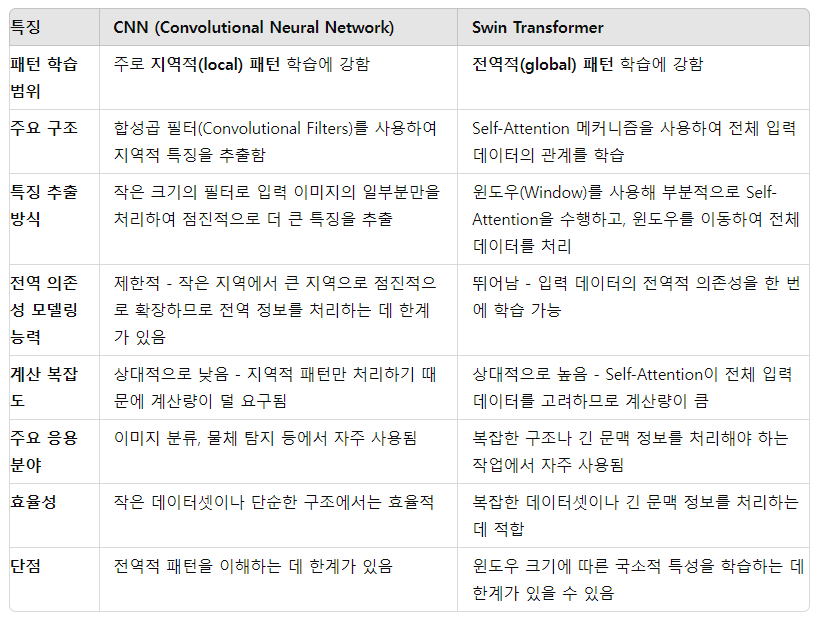
- **In Paper**
    - **주장**: 문자 내의 로컬 패턴(intra-character local patterns)과 문자 간의 장거리 연결(inter-character long-range connections)을 모두 캡쳐하는 것은 IE task에서 필수적이다!
    - 전자(CNN) -> 문자 인식에 필수적임 / 후자(Swin Transformer) -> 관심 필드의 인식 및 위치 지정 모두에 중요한 역할임
#### **1.3 DocParser**
- 문자 내 패턴과 문자 간 의존성을 모두 효율적으로 인식할 수 있도록 설계된 모델
- 다양한 데이터셋에서 SOTA 달성, 기존 방법들보다 최대 두 배 빠름

## **2. Related Work**
#### **2.1 OCR-dependant Approaches**
- **초기 접근 방식**
    - DL 이전: 확률적 접근, 규칙 기반, 수작업 feature 설계 등
    - 초기 DL: 텍스트 정보에만 의존, pre-trained 언어 모델 사용
    - **한계**: 낯선 템플릿에 적용했을 때 자주 실패함
- **layout 정보를 고려한 접근 방식**
    - **Chargrid 제안**: 문서를 2D 그리드로 인코딩해 2D 레이아웃 유지
    - **BERT와의 결합**: 문서 표현에 맥락 추가
    - **시각적 정보 활용**: Chargrid 개선 및 그래프 기반 모델 제안
- **최근 접근 방식**
    - **대규모 사전 학습**: 시각적, 텍스트적, 위치 정보를 통합하여 문서 이해를 향상시키기 위해 대규모 모델을 pre-training함
    - **LayoutLM 시리즈**: (multi-modal domain of document understanding 관련) LayoutLMv2는 공간적으로 편향된 주의를 도입해 성능 향상, LayoutLMv3는 ViT에서 영감을 받아 패치 임베딩 사용
    - **기타 모델**: LAMBERT는 OCR에서 얻은 레이아웃 특징을 활용하고, TILT는 인코더-디코더 구조로 사전 학습됨. Bros는 시각적 특징에 의존하지 않고 텍스트와 레이아웃 정보만을 활용함.
- **OCR 의존성의 한계**
    - 위의 모든 방법은 여전히 OCR system에 의해 성능과 계산 비용이 큰 영향을 받음

#### **2.2 End-to-end Approaches**
- **End-to-end 접근법의 등장**:
  - 최근 정보 추출 및 VRDU 작업에 End-to-end 접근법이 제안됨
- **초기 접근법**:
  - [12,22]: CNN 기반 encoder와 순환 신경망 기반 decoder 사용
  - **한계**: 정확도가 제한적이며 작은 데이터셋에서 성능 저하
- **multi-modal 접근법**:
  - **TRIE++ [4]**: 시각적 및 자연어 처리 작업을 연결하는 multi-modal 컨텍스트 블록을 사용하여 텍스트 읽기와 정보 추출을 동시에 학습
  - **VIES [41]**: 텍스트 감지, 인식, 정보 추출을 동시에 수행
  - **한계**: 학습을 위해 전체 문서 주석이 필요함
- **Swin Transformer 기반 접근법**:
  - **Donut [20]**: Swin Transformer encoder와 Bart 유사 decoder 사용.
  - **Dessurt [5]**: 시각적 토큰, 쿼리 토큰, 응답을 처리하는 세 가지 스트림과 cross-attention 메커니즘 사용
  - **한계**: 로컬 문자 패턴에 충분히 집중하지 않아 정보 추출 작업에서 최적의 성과를 내지 못함

## **3. Proposed Method: DocParser**
##### **DocParser란?**
- VRDs(시각적으로 풍부한 문서)에서 end-to-end 방식으로 정보를 추출하는 모델
- **input**: document image, task token(= 관심 필드 결정)
- **output**: 입력 이미지에서 추출된 필드를 나타내는 일련의 토큰
##### **Architecture**
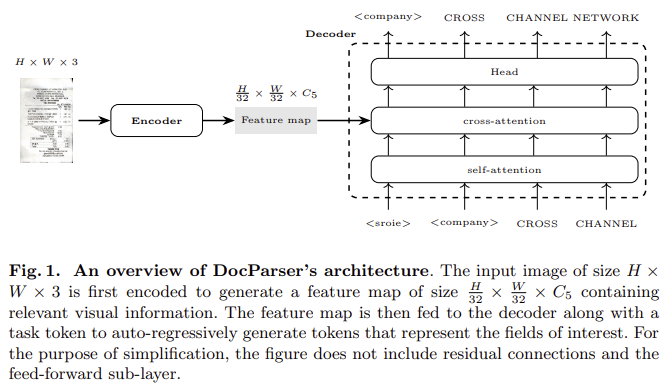
- **visual encoder**
    - CNN과 Swin Transformer로 구성됨 -> 로컬 패턴과 전역적인 패턴 모두 학습함
    - **CNN을 통해 로컬 패턴(문자 수준의 특징)을 추출하고, 이어서 Swin Transformer를 통해 전역적 의존성(문자 간의 관계 및 문서 전체의 구조)을 학습하는 구조**
    - 세 단계로 구성된 CNN: 점진적으로 높이 감소함, 문자의 로컬 패턴 추출함
    - 세 단계로 구성된 Swin Transformer: 점진적으로 폭이 감소함, 장거리 의존성 캡처함
 - **textual decoder**
     - $n$개의 transformer layer로 구성됨
     - each layer: multi-head self-attention, multi-head cross-attention, feed-forward sub-layer로 구성됨

#### **3.1 Encoder**
- **구성**: 총 여섯 단계로 구성됨
- **input**: 크기 $H × W × 3$의 이미지
- **처리 과정**
  1. **패치 임베딩**: 초기 패치 임베딩을 통해 입력 이미지를 $H/4 × W/4 × C0$ 크기의 패치로 변환
  2. **convNext 기반 단계들**: 문자 수준의 차별적 특징 추출
  3. **Swin Transformer 기반 단계들**: 장거리 의존성 캡처
- **output**: $H/32 × W/32 × C5$ feature map (다중 스케일의 특징을 포함함)
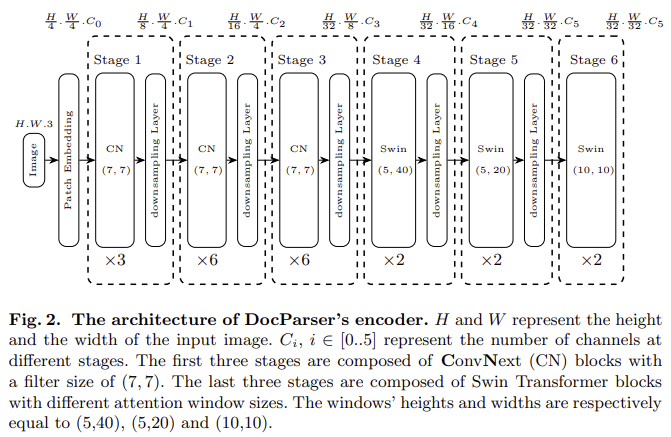

##### **패치 임베딩(Patch Embedding)**
- 점진적으로 중첩되는 patch embedding 사용함
- **목적**: 입력 이미지를 작은 패치로 나누어 이후 단계에서 효율적으로 처리할 수 있도록 함
- **과정**: 
  - 입력 이미지($W × H × 3$)는 먼저 스트라이드 2를 가진 3 × 3 합성곱을 통해 크기 $W/2 × H/2 × C0/2$의 출력으로 변환됨
  - 이어서 정규화 레이어와 또 다른 스트라이드 2를 가진 3 × 3 합성곱이 적용됨
- **output**: 최종 출력 크기는 $W/4 × H/4 × C0$임
##### **ConvNext 기반 단계들 (Stage 1~3)**
- **구성**: 첫 세 단계가 ConvNext 블록으로 구성되며, 모든 단계에서 커널 크기는 7로 설정됨
- **feature map 처리**:
  - 각 단계가 끝날 때마다 feature map의 높이가 절반으로 줄어들며, 채널 수는 정보 손실을 보상하기 위해 증가됨
  - 세 번째 단계가 끝날 때는 feature map의 너비도 절반으로 줄어듦
- **역할**: 문자 간의 상관관계를 캡처, 이미지의 비텍스트 부분을 인코딩
- 블록들 사이에서는 특징 맵의 너비를 줄이지 않음으로써 문자 구성 요소들이 동일한 특징 벡터로 인코딩되지 않도록 함 (*이해 못함*)
##### **Swin Transformer 기반 단계들 (Stage 4~6)**
- **구성**: 마지막 세 단계는 Swin Transformer 블록으로 구성되며, 각 블록은 서로 다른 attention window 크기(5×40, 5×20, 10×10)를 사용함
- **feature map 처리**:
  - 네 번째와 다섯 번째 단계에서 feature map의 너비는 절반으로 줄어들며, 채널 수는 정보 손실을 보상하기 위해 증가됨
- **역할**:
  - 문자 간 상관관계와 텍스트 및 비텍스트 구성 요소 간의 상관관계를 캡처함
  - 네 번째와 다섯 번째 단계에서는 수평으로 넓은 윈도우를 사용하여 인접 문장에 속하는 문자들 간의 상관관계를 포착함
  - 마지막 단계에서는 양방향으로 장거리 문맥을 캡처함
##### **위치 임베딩**
- **위치 임베딩 추가**: 인코더의 네 번째 단계 전에 특징 맵에 위치 임베딩이 추가됨
- **목적**: 다중 스케일의 특징을 통해 문자 간 로컬 패턴을 인코딩하고, 텍스트와 비텍스트 구성 요소 간의 상관관계를 캡처하여 관심 필드의 위치를 올바르게 지정하는 데 필요함

#### **3.2 Decoder**
- **input**: encoder의 출력, task token
- **output**: 자동 회귀 방식으로 관심 필드를 나타내는 토큰들을 생성함
- **구성**: $n^1$개의 layer로 구성되며, 각 layer는 multi-head self-attention, multi-head cross-attention, feed-forward sub-layer로 구성됨
##### **Tokenization**
- **RoBERTa 토크나이저 사용**: 실제 텍스트를 토큰으로 변환하여 메모리 사용량을 줄이고, 훈련 및 추론 시간을 단축함
- **특수 토큰 사용**: 필드의 시작과 끝을 표시하거나 반복되는 필드를 구분하기 위해 특수 토큰이 사용됨
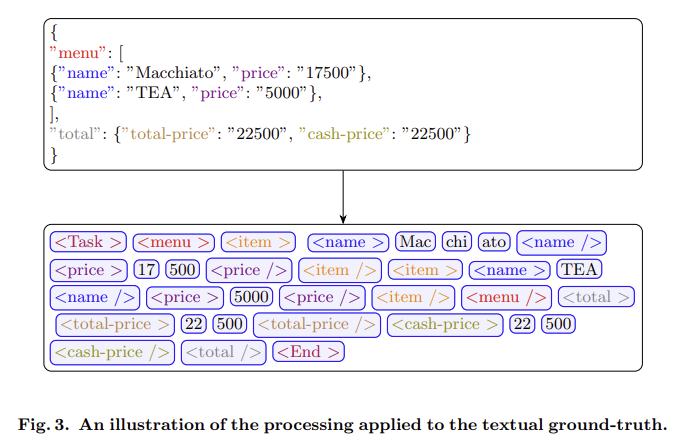
##### **At Training Time**
- **Teacher Forcing 전략 사용**: 모델 훈련 시, 디코더에 모든 실제 정답 토큰을 입력으로 제공하여 각 토큰의 히든 상태를 통해 다음 토큰을 예측함
- **triangular attention mask 사용**: self-attention layer에서 각 토큰이 이전 토큰들만 참조하도록 하기 위해 triangular attention mask 사용하여 다음 token들을 가림

## **4. Expriments and Results**
#### **4.1 Pre-training**
두 단계(지식 전이 단계, 마스킹된 문서 읽기 단계)로 진행됨 -> 문자 인식 능력과 언어적 이해 능력을 동시에 향상시킴
- **지식 전이 단계**
    - **목적**: ConvNext 기반 인코더가 PP-OCR-V2와 동일한 특징 맵을 생성하도록 학습시켜 문자 내부의 차별적 특징을 추출할 수 있는 능력을 부여함
        - **DocParser가 PP-OCR-V2와 동일한 특징 맵을 생성하도록 학습시키는 이유**: PP-OCR-V2는 문서 인식에서 매우 우수한 성능을 보이는 OCR 모델임
    - **방법**: L2 손실을 사용하여 ConvNext 블록이 PP-OCR-V2 백본의 출력과 유사한 특징 맵을 생성하도록 학습
    - **데이터셋**: IIT-CDIP 데이터셋의 20만 개 문서를 사용
    - **특징**: CNN의 평행 이동 등가성 덕분에 전체 이미지에서도 유용한 특징을 학습함
- **마스킹된 문서 읽기 단계**
    - **목적**: 문서 읽기 작업에서 모델이 문맥을 이해하고 마스킹된 영역의 텍스트를 예측하도록 학습시킴으로써 문자 인식과 언어적 지식을 동시에 학습
    - **방법**: 입력 이미지의 15%를 차지하는 32 × 32 블록을 마스킹하여, 모델이 이전 텍스트와 이미지를 바탕으로 다음 텍스트 토큰을 예측하도록 학습
    - **데이터셋**: IIT-CDIP 데이터셋의 150만 개 문서를 사용
    - **주석**: Donut을 사용하여 문서에 주석을 달고, 정규 표현식 규칙을 적용해 잘못 읽힌 문서는 폐기
#### **4.2 Fine-tuning**
- pre-training 후, DocParser는 IE task에 맞게 세 가지 데이터셋(SROIE, CORD, ISD)에서 fine-tuning됨.
- 각 데이터셋은 서로 다른 필드와 구조를 갖고 있기 때문에 DocParser가 다양한 유형의 문서에서 정보를 정확하게 추출할 수 있도록 학습함.
- **SROIE**
    - 공개 영수증 데이터셋으로, 회사, 날짜, 주소, 총액의 4가지 필드에 대해 주석이 달려 있음
    - 626개의 훈련용 영수증과 347개의 테스트용 영수증이 포함됨
- **CORD**
    - 공개 영수증 데이터셋으로, 30개의 고유 필드에 대해 주석이 달려 있음
    - 800개의 훈련용 이미지, 100개의 검증용 이미지, 100개의 테스트용 이미지를 포함
- **Information Statement Dataset (ISD)**
    - 비공개 정보 명세서 데이터셋으로, 18개의 필드에 주석이 달려 있음
    - 7500개의 훈련용 이미지, 3250개의 테스트용 이미지, 3250개의 평가용 이미지를 포함
    - 15개의 서로 다른 보험사에서 문서를 수집했으며, 각 보험사는 여러 템플릿을 가지고 있음. 

#### **4.5 Results**
- **model 비교**: DocParser를 Donut, Dessurt, LayoutLM-v3와 비교함
- **성과**: **SROIE, CORD, Information Statement Dataset**에서 DocParser는 각각 2.4, 0.5, 0.8 포인트의 성능 향상을 이루며, 새로운 SOTA를 기록함
- **DocParser**: 추론 속도가 훨씬 빠르고, 더 적은 파라미터를 가짐
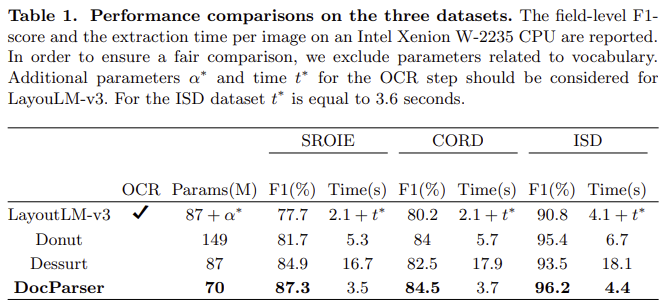

## **Conclusion**
- **DocParser**는 시각적으로 풍부한 문서에서 정보를 추출하는 빠르고 효율적인 end-to-end 접근 방식이다.
- **특징**: DocParser의 encoder는 **문자 내 로컬 패턴**과 **문자 간 장거리 의존성**을 모두 캡처하도록 설계되었다.
- **실험 결과**: 공공 및 사설 데이터셋에서 **속도**와 **정확성** 모두에서 SOTA 성능을 달성했다.
- **실제 응용**: DocParser은 실제 응용 분야에서 이상적으로 적합하며, 실용적인 정보 추출 작업에 효과적으로 활용될 수 있다.